## Load libraries

In [5]:
import numpy as np
import glob
from matplotlib import pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter
import seaborn as sns

from matplotlib.pyplot import cm

## Fetch data for each MD system

In [6]:
def fetch_rmsd(system_path, condition, first_resid=0, last_resid=-1):
    rmsd = []
    for i in sorted(glob.glob(system_path)):
        b = np.load(i)       
        rmsd.append(b[first_frame:last_frame]*10)
    
    return rmsd

## Plot data and print statistics

In [7]:
def plot(name):
    
    sem_rmsd_plot = []
    mean_rmsd_plot = []
    median_rmsd_plot = []
    nogly_mean = np.mean(all_rmsd[0], axis=1)
    
    #print statistics
    print("system n mean sem med p sig")
    for i,n in zip(range(len(all_rmsd)), ns):
        gly_mean = np.mean(all_rmsd[i], axis=1)
        
        stat, pvalue = stats.mannwhitneyu(nogly_mean, gly_mean)
        
        sem_rmsd = stats.sem(gly_mean)
        med_rmsd = np.median(gly_mean)
        skew = stats.skew(gly_mean)
        
        mean_rmsd_plot.append(gly_mean)
        sem_rmsd_plot.append(sem_rmsd)
        median_rmsd_plot.append(med_rmsd)
        if pvalue < 0.05/len(gly_cond):
            print(f"{gly_cond[i]} {n} {np.mean(gly_mean):.3f}  {sem_rmsd:.3f}  {med_rmsd:.3f}  {pvalue:.4f} *")
        else:
            print(f"{gly_cond[i]} {n} {np.mean(gly_mean):.3f}  {sem_rmsd:.3f}  {med_rmsd:.3f}  {pvalue:.4f} ")



    #plot violins
    color_map = cm.rainbow(np.linspace(0, 1, len(gly_cond)))
    plt.figure(figsize=(len(all_rmsd)/2,4))
    x=np.linspace(0, 0.5*(len(all_rmsd)-1), len(all_rmsd))
    
    sns.violinplot(mean_rmsd_plot, palette=color_map, inner="quartiles")
    plt.xticks(range(len(all_rmsd)), gly_cond, rotation=90)
    plt.ylim([0,6])
    plt.yticks(np.arange(0,6.5,1))
    
    #plt.savefig(f"{name}-CA-rmsd-violin.svg")

    


## SERT

system n mean sem med p sig
nogly 29 4.717  0.123  4.674  1.0000 
gly-N208 30 4.101  0.146  3.975  0.0030 *
gly-N217 30 4.403  0.155  4.385  0.1202 
gly-N208-N217 29 4.054  0.190  3.676  0.0020 *


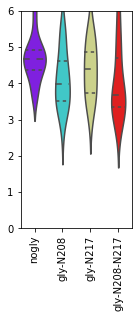

In [8]:
transporter = "SERT"


gly_cond = ['nogly', 'gly-N208', 'gly-N217',  'gly-N208-N217']
path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
ns = []

for condition in gly_cond:    
    system = f"{path}/{condition}/SERT-{condition}-5HT-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)

    
    
plot("SERT")



## DAT

system n mean sem med p sig
nogly 29 9.866  0.357  9.659  1.0000 
gly-N181 30 9.832  0.324  9.994  0.7330 
gly-N188 29 9.700  0.325  9.416  0.7206 
gly-N205 29 9.035  0.354  9.686  0.1968 
gly-N181-N188 30 10.210  0.263  10.122  0.3590 
gly-N181-N205 30 8.444  0.296  8.633  0.0074 
gly-N188-N205 29 8.970  0.309  9.188  0.0642 
gly-N181-N188-N205 30 9.129  0.377  9.482  0.2223 


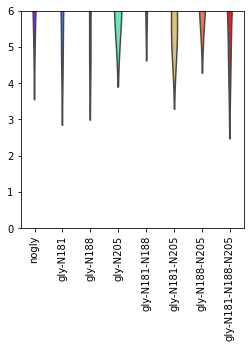

In [9]:
transporter = "DAT"

gly_cond = ['nogly', 'gly-N181','gly-N188', 'gly-N205', 
           'gly-N181-N188', 'gly-N181-N205', 
           'gly-N188-N205', 'gly-N181-N188-N205']

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
a = []
for condition in gly_cond:    
    system = f"{path}/{condition}/DAT-{condition}-DA-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("DAT")



## B0AT1

system n mean sem med p sig
no-gly 30 2.967  0.145  2.896  1.0000 
gly-N158 29 2.860  0.110  2.640  0.5696 
gly-N182 29 2.956  0.107  2.784  0.8855 
gly-N158-N182 30 2.797  0.073  2.678  0.5106 


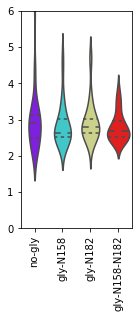

In [10]:
transporter ="B0AT1"

gly_cond = ['no-gly', 'gly-N158', 'gly-N182',  'gly-N158-N182']

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a= []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/B0AT1-{condition}-LEU-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("B0AT1")

## GlyT1

system n mean sem med p sig
nogly 30 7.460  0.261  7.251  1.0000 
gly-N237 30 7.292  0.275  7.140  0.4464 
gly-N240 30 7.709  0.156  7.754  0.3183 
gly-N250 29 7.526  0.197  7.463  0.6657 
gly-N256 30 7.344  0.183  7.299  0.7731 
gly-N237-N240 30 7.088  0.181  7.036  0.2643 
gly-N237-N250 29 8.091  0.330  7.991  0.3207 
gly-N237-N256 30 7.660  0.260  7.556  0.7618 
gly-N240-N250 30 7.616  0.204  7.213  0.6735 
gly-N240-N256 30 7.138  0.214  7.128  0.4376 
gly-N250-N256 30 7.951  0.356  7.789  0.4119 
gly-N237-N240-N250 29 7.490  0.178  7.262  0.8735 
gly-N237-N240-N256 30 7.506  0.222  7.608  0.9705 
gly-N237-N250-N256 30 7.809  0.246  7.558  0.4733 
gly-N240-N250-N256 30 7.680  0.234  7.743  0.3790 
gly-N237-N240-N250-N256 30 7.656  0.247  7.522  0.6952 


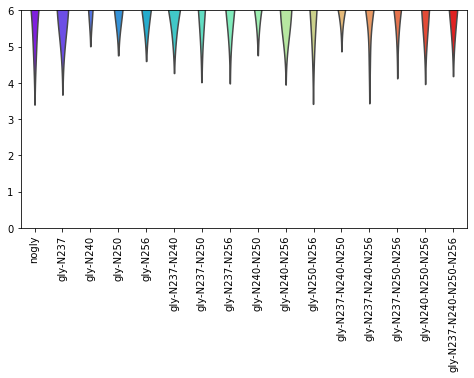

In [11]:
transporter ="GLYT1"

gly_cond = ["nogly",
            "gly-N237", "gly-N240", "gly-N250", "gly-N256",
            "gly-N237-N240", "gly-N237-N250", "gly-N237-N256",
            "gly-N240-N250", "gly-N240-N256", "gly-N250-N256",
            "gly-N237-N240-N250", "gly-N237-N240-N256",
            "gly-N237-N250-N256", "gly-N240-N250-N256",
            "gly-N237-N240-N250-N256"]

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/GLYT-{condition}-ZG-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("GLYT1")

## SERT-oligoglycans

system n mean sem med p sig
nogly 29 4.717  0.123  4.674  1.0000 
gly-N208-N217 29 4.054  0.190  3.676  0.0020 *
2gly-N208-N217 30 4.325  0.144  4.056  0.0724 
5branch-gly-N208-N217 30 4.074  0.175  3.984  0.0015 *
9branch-gly-N208-N217 30 4.074  0.135  3.908  0.0010 *


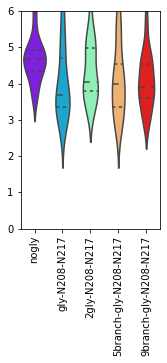

In [12]:
transporter = "SERT"


gly_cond = ['nogly', 'gly-N208-N217', '2gly-N208-N217', '5branch-gly-N208-N217', '9branch-gly-N208-N217']
path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
ns = []

for condition in gly_cond:    
    system = f"{path}/{condition}/SERT-{condition}-5HT-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)

    
    
plot("SERT-multi")



## DAT-oligoglycans

system n mean sem med p sig
nogly 29 9.866  0.357  9.659  1.0000 
gly-N181-N188-N205 30 9.129  0.377  9.482  0.2223 
2gly-N181-N188-N205 29 9.982  0.263  10.169  0.7915 
5branch-gly-N181-N188-N205 30 9.743  0.259  9.994  0.9335 
9branch-gly-N181-N188-N205 30 8.678  0.299  8.633  0.0137 


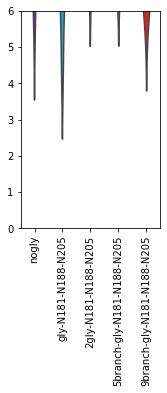

In [13]:
transporter="DAT"

gly_cond = ['nogly', 'gly-N181-N188-N205', '2gly-N181-N188-N205', 
            '5branch-gly-N181-N188-N205', '9branch-gly-N181-N188-N205']

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
a = []
for condition in gly_cond:    
    system = f"{path}/{condition}/DAT-{condition}-DA-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("DAT-multi")



## B0AT1-oligoglycans

system n mean sem med p sig
no-gly 30 2.967  0.145  2.896  1.0000 
gly-N158-N182 30 2.797  0.073  2.678  0.5106 
2gly-N158-N182 30 2.720  0.077  2.627  0.2282 
5branch-gly-N158-N182 29 2.404  0.062  2.348  0.0003 *
9branch-gly-N158-N182 29 2.636  0.093  2.659  0.0853 


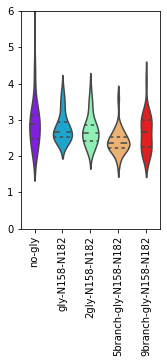

In [14]:
transporter = "B0AT1"

gly_cond = ['no-gly', 'gly-N158-N182', '2gly-N158-N182', '5branch-gly-N158-N182', '9branch-gly-N158-N182']

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/B0AT1-{condition}-LEU-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("B0AT1-multi")

## GlyT1-oligoglycans

system n mean sem med p sig
nogly 30 7.460  0.261  7.251  1.0000 
gly-N237-N240-N250-N256 30 7.656  0.247  7.522  0.6952 
2gly-N237-N240-N250-N256 30 6.109  0.214  6.000  0.0002 *
5branch-gly-N237-N240-N250-N256 30 5.638  0.209  5.464  0.0000 *
9branch-gly-N237-N240-N250-N256 30 5.027  0.204  4.910  0.0000 *


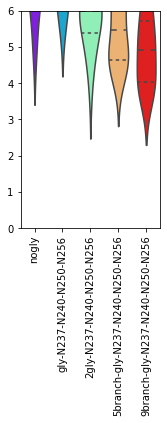

In [15]:
transporter="GLYT1"

gly_cond = ["nogly",
            "gly-N237-N240-N250-N256",
            "2gly-N237-N240-N250-N256",
           "5branch-gly-N237-N240-N250-N256",
           "9branch-gly-N237-N240-N250-N256"]

path = f"calculated_features/{transporter}/rmsd-EL2/" 

first_frame, last_frame = [1000,10000]

all_rmsd = []
cat_rmsd = []
a = []
ns = []
for condition in gly_cond:    
    system = f"{path}/{condition}/GLYT-{condition}-ZG-NaCl-CLONE*-strip.xtc-el2-rmsd.npy"
    ns.append(len(glob.glob(system)))
    rmsd = fetch_rmsd(system, condition, first_frame, last_frame)
    
    all_rmsd.append(rmsd)
    
plot("GLYT1-multi")